## Calculate Centered Kernel Alignment to Compare Features - NSynth
As proposed in: https://arxiv.org/pdf/1905.00414.pdf

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.7)
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import time

In [2]:
def linear_CKA(X, Y):
    ## Convert to tensor
    X = torch.from_numpy(X).float()
    Y = torch.from_numpy(Y).float()
    num = torch.norm(Y.T@X, p = 'fro')
    d1 = torch.norm(X.T@X, p = 'fro')
    d2 = torch.norm(Y.T@Y, p = 'fro')
    sim = ((num/d1)*(num/d2))
    sim = sim.numpy()
    return(sim)

## (1) init x init x arch (Regular and Deformable)

In [3]:
ckatrain = np.zeros((5, 5, 2))
ckatest = np.zeros((5, 5, 2))
arch_list = ['Regular', 'Deformable']

In [4]:
for k in range(len(arch_list)):
    for i in range(5):
        for j in range(i+1, 5):
            ## i 
            feat = np.load('../../Deep-Features/NSynth/'+arch_list[k]+'-'+str(i)+'-train.npz')
            l3_train = feat['arr_0']
            feat = np.load('../../Deep-Features/NSynth/'+arch_list[k]+'-'+str(i)+'-test.npz')
            l3_test = feat['arr_0']
            ## Flatten and scale
            ## Data loader
            l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
            l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
            scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
            X_train = scaler.transform(l3_train)
            X_test = scaler.transform(l3_test)
            ## j 
            feat = np.load('../../Deep-Features/NSynth/'+arch_list[k]+'-'+str(j)+'-train.npz')
            l3_train = feat['arr_0']
            feat = np.load('../../Deep-Features/NSynth/'+arch_list[k]+'-'+str(j)+'-test.npz')
            l3_test = feat['arr_0']
            ## Flatten and scale
            ## Data loader
            l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
            l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
            scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
            Y_train = scaler.transform(l3_train)
            Y_test = scaler.transform(l3_test)
            ## Calculate linear CKA
            ckatrain[i,j,k] = linear_CKA(X_train, Y_train)
            ckatest[i,j,k] = linear_CKA(X_test, Y_test)
            print(i, j, k)

0 1 0
0 2 0
0 3 0
0 4 0
1 2 0
1 3 0
1 4 0
2 3 0
2 4 0
3 4 0
0 1 1
0 2 1
0 3 1
0 4 1
1 2 1
1 3 1
1 4 1
2 3 1
2 4 1
3 4 1


In [5]:
## Fill in rest of matrix since symmetric
for k in range(ckatrain.shape[2]):
    ckatrain[:,:,k] = ckatrain[:,:,k] + ckatrain[:,:,k].T
    np.fill_diagonal(ckatrain[:,:,k], 1)
    ckatest[:,:,k] = ckatest[:,:,k] + ckatest[:,:,k].T
    np.fill_diagonal(ckatest[:,:,k], 1)
np.savez('Results/NSynth/init-init-arch', ckatrain, ckatest)

## (2) arch x arch x init

In [6]:
ckatrain = np.zeros((5, 5, 5))
ckatest = np.zeros((5, 5, 5))
arch_list = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']

In [7]:
for k in range(5): ## inits
    for i in range(len(arch_list)):
        ## i 
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[i]+'-'+str(k)+'-train.npz')
        l3_train = feat['arr_0']
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[i]+'-'+str(k)+'-test.npz')
        l3_test = feat['arr_0']
        ## Flatten and scale
        ## Data loader
        l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
        l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
        scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
        X_train = scaler.transform(l3_train)
        X_test = scaler.transform(l3_test)
        for j in range(i+1, len(arch_list)):
            ## j 
            feat = np.load('../../Deep-Features/NSynth/'+arch_list[j]+'-'+str(k)+'-train.npz')
            l3_train = feat['arr_0']
            feat = np.load('../../Deep-Features/NSynth/'+arch_list[j]+'-'+str(k)+'-test.npz')
            l3_test = feat['arr_0']
            ## Flatten and scale
            ## Data loader
            l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
            l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
            scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
            Y_train = scaler.transform(l3_train)
            Y_test = scaler.transform(l3_test)
            ## Calculate linear CKA
            ckatrain[i,j,k] = linear_CKA(X_train, Y_train)
            ckatest[i,j,k] = linear_CKA(X_test, Y_test)
            print(i, j, k)

0 1 0
0 2 0
0 3 0
0 4 0
1 2 0
1 3 0
1 4 0
2 3 0
2 4 0
3 4 0
0 1 1
0 2 1
0 3 1
0 4 1
1 2 1
1 3 1
1 4 1
2 3 1
2 4 1
3 4 1
0 1 2
0 2 2
0 3 2
0 4 2
1 2 2
1 3 2
1 4 2
2 3 2
2 4 2
3 4 2
0 1 3
0 2 3
0 3 3
0 4 3
1 2 3
1 3 3
1 4 3
2 3 3
2 4 3
3 4 3
0 1 4
0 2 4
0 3 4
0 4 4
1 2 4
1 3 4
1 4 4
2 3 4
2 4 4
3 4 4


In [8]:
## Fill in rest of matrix since symmetric
for k in range(ckatrain.shape[2]):
    ckatrain[:,:,k] = ckatrain[:,:,k] + ckatrain[:,:,k].T
    np.fill_diagonal(ckatrain[:,:,k], 1)
    ckatest[:,:,k] = ckatest[:,:,k] + ckatest[:,:,k].T
    np.fill_diagonal(ckatest[:,:,k], 1)
np.savez('Results/NSynth/arch-arch-init', ckatrain, ckatest)

## (3) class x class x init

In [3]:
ckatrain = np.zeros((8, 8, 5))
ckatest = np.zeros((8, 8, 5))

In [19]:
## Regular 
arch = 'Regular'
for k in range(5): ## inits
    ## i 
    feat = np.load('../../Deep-Features/NSynth/'+arch+'-'+str(k)+'-train.npz')
    l3_train = feat['arr_0']
    train_labs = feat['arr_1']
    feat = np.load('../../Deep-Features/NSynth/'+arch+'-'+str(k)+'-test.npz')
    l3_test = feat['arr_0']
    test_labs = feat['arr_1']
    ## Flatten and scale
    ## Data loader
    l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
    l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
    scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
    X_train = scaler.transform(l3_train)
    X_test = scaler.transform(l3_test)
    for i in range(8):
        ## Separate by class
        i_train = np.where(train_labs == i)[0][:500]
        i_test = np.where(test_labs == i)[0][:500]
        Xt = X_train[i_train, :]
        Xte = X_test[i_test, :]
        for j in range(i+1, 8):
            ## j 
            j_train = np.where(train_labs == j)[0][:500]
            j_test = np.where(test_labs == j)[0][:500]
            
            Yt = X_train[j_train, :]
            Yte = X_test[j_test, :]
            
            ## Calculate linear CKA
            ckatrain[i,j,k] = linear_CKA(Xt, Yt)
            ckatest[i,j,k] = linear_CKA(Xte, Yte)
            print(i, j, k)

0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
0 6 0
0 7 0
1 2 0
1 3 0
1 4 0
1 5 0
1 6 0
1 7 0
2 3 0
2 4 0
2 5 0
2 6 0
2 7 0
3 4 0
3 5 0
3 6 0
3 7 0
4 5 0
4 6 0
4 7 0
5 6 0
5 7 0
6 7 0
0 1 1
0 2 1
0 3 1
0 4 1
0 5 1
0 6 1
0 7 1
1 2 1
1 3 1
1 4 1
1 5 1
1 6 1
1 7 1
2 3 1
2 4 1
2 5 1
2 6 1
2 7 1
3 4 1
3 5 1
3 6 1
3 7 1
4 5 1
4 6 1
4 7 1
5 6 1
5 7 1
6 7 1
0 1 2
0 2 2
0 3 2
0 4 2
0 5 2
0 6 2
0 7 2
1 2 2
1 3 2
1 4 2
1 5 2
1 6 2
1 7 2
2 3 2
2 4 2
2 5 2
2 6 2
2 7 2
3 4 2
3 5 2
3 6 2
3 7 2
4 5 2
4 6 2
4 7 2
5 6 2
5 7 2
6 7 2
0 1 3
0 2 3
0 3 3
0 4 3
0 5 3
0 6 3
0 7 3
1 2 3
1 3 3
1 4 3
1 5 3
1 6 3
1 7 3
2 3 3
2 4 3
2 5 3
2 6 3
2 7 3
3 4 3
3 5 3
3 6 3
3 7 3
4 5 3
4 6 3
4 7 3
5 6 3
5 7 3
6 7 3
0 1 4
0 2 4
0 3 4
0 4 4
0 5 4
0 6 4
0 7 4
1 2 4
1 3 4
1 4 4
1 5 4
1 6 4
1 7 4
2 3 4
2 4 4
2 5 4
2 6 4
2 7 4
3 4 4
3 5 4
3 6 4
3 7 4
4 5 4
4 6 4
4 7 4
5 6 4
5 7 4
6 7 4


In [20]:
## Fill in rest of matrix since symmetric
for k in range(ckatrain.shape[2]):
    ckatrain[:,:,k] = ckatrain[:,:,k] + ckatrain[:,:,k].T
    np.fill_diagonal(ckatrain[:,:,k], 1)
    ckatest[:,:,k] = ckatest[:,:,k] + ckatest[:,:,k].T
    np.fill_diagonal(ckatest[:,:,k], 1)
np.savez('Results/NSynth/class-class-init-Regular', ckatrain, ckatest)

In [21]:
ckatrain = np.zeros((8, 8, 5))
ckatest = np.zeros((8, 8, 5))

In [22]:
## Deformable 
arch = 'Deformable'
for k in range(5): ## inits
    ## i 
    feat = np.load('../../Deep-Features/NSynth/'+arch+'-'+str(k)+'-train.npz')
    l3_train = feat['arr_0']
    train_labs = feat['arr_1']
    feat = np.load('../../Deep-Features/NSynth/'+arch+'-'+str(k)+'-test.npz')
    l3_test = feat['arr_0']
    test_labs = feat['arr_1']
    ## Flatten and scale
    ## Data loader
    l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
    l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
    scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
    X_train = scaler.transform(l3_train)
    X_test = scaler.transform(l3_test)
    for i in range(8):
        ## Separate by class
        i_train = np.where(train_labs == i)[0][:500]
        i_test = np.where(test_labs == i)[0][:500]
        Xt = X_train[i_train, :]
        Xte = X_test[i_test, :]
        for j in range(i+1, 8):
            ## j 
            j_train = np.where(train_labs == j)[0][:500]
            j_test = np.where(test_labs == j)[0][:500]
            
            Yt = X_train[j_train, :]
            Yte = X_test[j_test, :]
            
            ## Calculate linear CKA
            ckatrain[i,j,k] = linear_CKA(Xt, Yt)
            ckatest[i,j,k] = linear_CKA(Xte, Yte)
            print(i, j, k)

0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
0 6 0
0 7 0
1 2 0
1 3 0
1 4 0
1 5 0
1 6 0
1 7 0
2 3 0
2 4 0
2 5 0
2 6 0
2 7 0
3 4 0
3 5 0
3 6 0
3 7 0
4 5 0
4 6 0
4 7 0
5 6 0
5 7 0
6 7 0
0 1 1
0 2 1
0 3 1
0 4 1
0 5 1
0 6 1
0 7 1
1 2 1
1 3 1
1 4 1
1 5 1
1 6 1
1 7 1
2 3 1
2 4 1
2 5 1
2 6 1
2 7 1
3 4 1
3 5 1
3 6 1
3 7 1
4 5 1
4 6 1
4 7 1
5 6 1
5 7 1
6 7 1
0 1 2
0 2 2
0 3 2
0 4 2
0 5 2
0 6 2
0 7 2
1 2 2
1 3 2
1 4 2
1 5 2
1 6 2
1 7 2
2 3 2
2 4 2
2 5 2
2 6 2
2 7 2
3 4 2
3 5 2
3 6 2
3 7 2
4 5 2
4 6 2
4 7 2
5 6 2
5 7 2
6 7 2
0 1 3
0 2 3
0 3 3
0 4 3
0 5 3
0 6 3
0 7 3
1 2 3
1 3 3
1 4 3
1 5 3
1 6 3
1 7 3
2 3 3
2 4 3
2 5 3
2 6 3
2 7 3
3 4 3
3 5 3
3 6 3
3 7 3
4 5 3
4 6 3
4 7 3
5 6 3
5 7 3
6 7 3
0 1 4
0 2 4
0 3 4
0 4 4
0 5 4
0 6 4
0 7 4
1 2 4
1 3 4
1 4 4
1 5 4
1 6 4
1 7 4
2 3 4
2 4 4
2 5 4
2 6 4
2 7 4
3 4 4
3 5 4
3 6 4
3 7 4
4 5 4
4 6 4
4 7 4
5 6 4
5 7 4
6 7 4


In [23]:
## Fill in rest of matrix since symmetric
for k in range(ckatrain.shape[2]):
    ckatrain[:,:,k] = ckatrain[:,:,k] + ckatrain[:,:,k].T
    np.fill_diagonal(ckatrain[:,:,k], 1)
    ckatest[:,:,k] = ckatest[:,:,k] + ckatest[:,:,k].T
    np.fill_diagonal(ckatest[:,:,k], 1)
np.savez('Results/NSynth/class-class-init-Deformable', ckatrain, ckatest)

## (4) arch x spec features x init

In [3]:
## Load in spec/hand-crafted features
## Load in data
labels = np.load('../../Data/NSynth/accoustic-labels.npz')
inds = np.load('../../Data/NSynth/accoustic-train-test-inds.npz')
features = np.load('../../Data/NSynth/accoustic-features.npz')


rms_list = features['arr_0'] 
cs_list = features['arr_1']
bw_list = features['arr_2'] 
fl_list = features['arr_3']
roll_list = features['arr_4'] 
medp_time = features['arr_5']
meanp_time = features['arr_6'] 
tp80 = features['arr_7'] 
tp75 = features['arr_8'] 
tp70 = features['arr_9'] 
meanvalF = features['arr_10']

instrument_family = labels['arr_0']
instrument = labels['arr_1']
pitch = labels['arr_2']
velocity = labels['arr_3']
sound_qualities = labels['arr_4']
source = labels['arr_5']

## train_test split
train_inds = inds['arr_0']
test_inds = inds['arr_1']
train_if = instrument_family[train_inds]
test_if = instrument_family[test_inds]

train_pitch = pitch[train_inds]
test_pitch = pitch[test_inds]

train_velocity = velocity[train_inds]
test_velocity = velocity[test_inds]

train_sq = sound_qualities[train_inds, :]
test_sq = sound_qualities[test_inds, :]

train_rms = rms_list[train_inds, :]
test_rms = rms_list[test_inds, :]
train_cs = cs_list[train_inds, :]
test_cs = cs_list[test_inds, :]
train_bw = bw_list[train_inds, :]
test_bw = bw_list[test_inds, :]
train_fl = fl_list[train_inds, :]
test_fl = fl_list[test_inds, :]
train_roll = roll_list[train_inds, :]
test_roll = roll_list[test_inds, :]
train_medp = medp_time[train_inds, :]
test_medp = medp_time[test_inds, :]
train_meanp = meanp_time[train_inds, :]
test_meanp = meanp_time[test_inds, :]
train_tp80 = tp80[train_inds, :]
test_tp80 = tp80[test_inds, :]
train_tp75 = tp75[train_inds, :]
test_tp75 = tp75[test_inds, :]
train_tp70 = tp70[train_inds, :]
test_tp70 = tp70[test_inds, :]
train_meanvalF = meanvalF[:,train_inds, :]
test_meanvalF = meanvalF[:,test_inds, :]

## Additional Wavelet Features
addwavelets = np.load('../../Data/NSynth/accoustic-features2.npy')
train_addwavelets = addwavelets[:,train_inds, :]
test_addwavelets = addwavelets[:,test_inds, :]


## Normalize all features
scaler = preprocessing.StandardScaler(with_std = False).fit(train_rms)
train_rms = scaler.transform(train_rms)
test_rms = scaler.transform(test_rms)

scaler = preprocessing.StandardScaler(with_std = False).fit(train_cs)
train_cs = scaler.transform(train_cs)
test_cs = scaler.transform(test_cs)

scaler = preprocessing.StandardScaler(with_std = False).fit(train_bw)
train_bw = scaler.transform(train_bw)
test_bw = scaler.transform(test_bw)

scaler = preprocessing.StandardScaler(with_std = False).fit(train_fl)
train_fl = scaler.transform(train_fl)
test_fl = scaler.transform(test_fl)

scaler = preprocessing.StandardScaler(with_std = False).fit(train_roll)
train_roll = scaler.transform(train_roll)
test_roll = scaler.transform(test_roll)

scaler = preprocessing.StandardScaler(with_std = False).fit(train_medp)
train_medp = scaler.transform(train_medp)
test_medp = scaler.transform(test_medp)

scaler = preprocessing.StandardScaler(with_std = False).fit(train_meanp)
train_meanp = scaler.transform(train_meanp)
test_meanp = scaler.transform(test_meanp)

scaler = preprocessing.StandardScaler(with_std = False).fit(train_tp80)
train_tp80 = scaler.transform(train_tp80)
test_tp80 = scaler.transform(test_tp80)

scaler = preprocessing.StandardScaler(with_std = False).fit(train_tp75)
train_tp75 = scaler.transform(train_tp75)
test_tp75 = scaler.transform(test_tp75)

scaler = preprocessing.StandardScaler(with_std = False).fit(train_tp70)
train_tp70 = scaler.transform(train_tp70)
test_tp70 = scaler.transform(test_tp70)

scaler = preprocessing.StandardScaler(with_std = False).fit(train_meanvalF[0,:,:])
train_wave1 = scaler.transform(train_meanvalF[0,:,:])
test_wave1 = scaler.transform(test_meanvalF[0,:,:])

scaler = preprocessing.StandardScaler(with_std = False).fit(train_meanvalF[1,:,:])
train_wave5 = scaler.transform(train_meanvalF[1,:,:])
test_wave5 = scaler.transform(test_meanvalF[1,:,:])

scaler = preprocessing.StandardScaler(with_std = False).fit(train_meanvalF[2,:,:])
train_wave10 = scaler.transform(train_meanvalF[2,:,:])
test_wave10 = scaler.transform(test_meanvalF[2,:,:])

scaler = preprocessing.StandardScaler(with_std = False).fit(train_meanvalF[3,:,:])
train_wave25 = scaler.transform(train_meanvalF[3,:,:])
test_wave25 = scaler.transform(test_meanvalF[3,:,:])

### Additional Wavelet Features
scaler = preprocessing.StandardScaler(with_std = False).fit(train_addwavelets[0,:,:])
train_wavemed = scaler.transform(train_addwavelets[0,:,:])
test_wavemed = scaler.transform(test_addwavelets[0,:,:])

scaler = preprocessing.StandardScaler(with_std = False).fit(train_addwavelets[1,:,:])
train_wavesd = scaler.transform(train_addwavelets[1,:,:])
test_wavesd = scaler.transform(test_addwavelets[1,:,:])

scaler = preprocessing.StandardScaler(with_std = False).fit(train_addwavelets[2,:,:])
train_wavevar = scaler.transform(train_addwavelets[2,:,:])
test_wavevar = scaler.transform(test_addwavelets[2,:,:])

scaler = preprocessing.StandardScaler(with_std = False).fit(train_addwavelets[3,:,:])
train_wavekurt = scaler.transform(train_addwavelets[3,:,:])
test_wavekurt = scaler.transform(test_addwavelets[3,:,:])

scaler = preprocessing.StandardScaler(with_std = False).fit(train_addwavelets[4,:,:])
train_waveq25 = scaler.transform(train_addwavelets[4,:,:])
test_waveq25 = scaler.transform(test_addwavelets[4,:,:])

scaler = preprocessing.StandardScaler(with_std = False).fit(train_addwavelets[5,:,:])
train_waveq75 = scaler.transform(train_addwavelets[5,:,:])
test_waveq75 = scaler.transform(test_addwavelets[5,:,:])

## Add random noise for baseline
train_random = np.random.normal(0, 1, 
                                size = train_rms.shape[0]*train_rms.shape[1]).reshape(train_rms.shape)
test_random = np.random.normal(0, 1, 
                                size = test_rms.shape[0]*test_rms.shape[1]).reshape(test_rms.shape)

In [4]:

wavecombine = np.hstack([train_wavemed, train_wavesd, train_wavevar,
                           train_wavekurt, train_waveq25, train_waveq75])
top5combine = np.hstack([train_meanp, train_tp70, train_wave25, wavecombine])


spec_features = [train_rms, train_cs, train_bw, train_fl, train_roll, train_medp,
                 train_meanp, train_tp80, train_tp75, train_tp70, train_wave1, 
                 train_wave5, train_wave10, train_wave25, train_wavemed, train_wavesd, 
                 train_wavevar,train_wavekurt, train_waveq25, train_waveq75, 
                 wavecombine, top5combine, train_random]


In [5]:
ckatrain = np.zeros((5, len(spec_features), 1))
arch_list = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']


In [6]:
for k in range(1): ## inits
    for i in range(len(arch_list)):
        ## i - architecture
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[i]+'-'+str(k)+'-train.npz')
        l3_train = feat['arr_0']
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[i]+'-'+str(k)+'-test.npz')
        l3_test = feat['arr_0']
        ## Flatten and scale
        ## Data loader
        l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
        l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
        scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
        X_train = scaler.transform(l3_train)
        X_test = scaler.transform(l3_test)
        for j in range(len(spec_features)):
            ## j - hand-crafted feature
            ## Calculate linear CKA
            ckatrain[i,j,k] = linear_CKA(X_train, spec_features[j])
#             ckatest[i,j,k] = linear_CKA(X_test, Y_test)
            print(i, j, k)

0 0 0
0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
0 6 0
0 7 0
0 8 0
0 9 0
0 10 0
0 11 0
0 12 0
0 13 0
0 14 0
0 15 0
0 16 0
0 17 0
0 18 0
0 19 0
0 20 0
0 21 0
0 22 0
1 0 0
1 1 0
1 2 0
1 3 0
1 4 0
1 5 0
1 6 0
1 7 0
1 8 0
1 9 0
1 10 0
1 11 0
1 12 0
1 13 0
1 14 0
1 15 0
1 16 0
1 17 0
1 18 0
1 19 0
1 20 0
1 21 0
1 22 0
2 0 0
2 1 0
2 2 0
2 3 0
2 4 0
2 5 0
2 6 0
2 7 0
2 8 0
2 9 0
2 10 0
2 11 0
2 12 0
2 13 0
2 14 0
2 15 0
2 16 0
2 17 0
2 18 0
2 19 0
2 20 0
2 21 0
2 22 0
3 0 0
3 1 0
3 2 0
3 3 0
3 4 0
3 5 0
3 6 0
3 7 0
3 8 0
3 9 0
3 10 0
3 11 0
3 12 0
3 13 0
3 14 0
3 15 0
3 16 0
3 17 0
3 18 0
3 19 0
3 20 0
3 21 0
3 22 0
4 0 0
4 1 0
4 2 0
4 3 0
4 4 0
4 5 0
4 6 0
4 7 0
4 8 0
4 9 0
4 10 0
4 11 0
4 12 0
4 13 0
4 14 0
4 15 0
4 16 0
4 17 0
4 18 0
4 19 0
4 20 0
4 21 0
4 22 0
0 0 1
0 1 1
0 2 1
0 3 1
0 4 1
0 5 1
0 6 1
0 7 1
0 8 1
0 9 1
0 10 1
0 11 1
0 12 1
0 13 1
0 14 1
0 15 1


KeyboardInterrupt: 

In [7]:
np.save('Results/NSynth/arch-spec-init-all.npy', ckatrain)

In [ ]:
# spec_features = [train_rms, train_cs, train_bw, train_fl, train_roll, train_medp,
#                  train_meanp, train_tp80, train_tp75, train_tp70, train_wave1, 
#                  train_wave5, train_wave10, train_wave25, train_wavemed, train_wavesd, 
#                  train_wavevar,train_wavekurt, train_waveq25, train_waveq75, 
#                  wavecombine, top5combine, train_random]


In [9]:
ckatrain5 = np.zeros((5, 6, 5))
ckatrain5[:,:,0] = ckatrain[:, [6, 9, 13, 20, 21, 22], 0]

In [11]:

wavecombine = np.hstack([train_wavemed, train_wavesd, train_wavevar,
                           train_wavekurt, train_waveq25, train_waveq75])
top5combine = np.hstack([train_meanp, train_tp70, train_wave25, wavecombine])


spec_features = [train_meanp, train_tp70, train_wave25, 
                 wavecombine, top5combine, train_random]
arch_list = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']


In [12]:
for k in range(1,5): ## inits
    for i in range(len(arch_list)):
        ## i - architecture
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[i]+'-'+str(k)+'-train.npz')
        l3_train = feat['arr_0']
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[i]+'-'+str(k)+'-test.npz')
        l3_test = feat['arr_0']
        ## Flatten and scale
        ## Data loader
        l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
        l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
        scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
        X_train = scaler.transform(l3_train)
        X_test = scaler.transform(l3_test)
        for j in range(len(spec_features)):
            ## j - hand-crafted feature
            ## Calculate linear CKA
            ckatrain5[i,j,k] = linear_CKA(X_train, spec_features[j])
#             ckatest[i,j,k] = linear_CKA(X_test, Y_test)
            print(i, j, k)

0 0 1
0 1 1
0 2 1
0 3 1
0 4 1
0 5 1
1 0 1
1 1 1
1 2 1
1 3 1
1 4 1
1 5 1
2 0 1
2 1 1
2 2 1
2 3 1
2 4 1
2 5 1
3 0 1
3 1 1
3 2 1
3 3 1
3 4 1
3 5 1
4 0 1
4 1 1
4 2 1
4 3 1
4 4 1
4 5 1
0 0 2
0 1 2
0 2 2
0 3 2
0 4 2
0 5 2
1 0 2
1 1 2
1 2 2
1 3 2
1 4 2
1 5 2
2 0 2
2 1 2
2 2 2
2 3 2
2 4 2
2 5 2
3 0 2
3 1 2
3 2 2
3 3 2
3 4 2
3 5 2
4 0 2
4 1 2
4 2 2
4 3 2
4 4 2
4 5 2
0 0 3
0 1 3
0 2 3
0 3 3
0 4 3
0 5 3
1 0 3
1 1 3
1 2 3
1 3 3
1 4 3
1 5 3
2 0 3
2 1 3
2 2 3
2 3 3
2 4 3
2 5 3
3 0 3
3 1 3
3 2 3
3 3 3
3 4 3
3 5 3
4 0 3
4 1 3
4 2 3
4 3 3
4 4 3
4 5 3
0 0 4
0 1 4
0 2 4
0 3 4
0 4 4
0 5 4
1 0 4
1 1 4
1 2 4
1 3 4
1 4 4
1 5 4
2 0 4
2 1 4
2 2 4
2 3 4
2 4 4
2 5 4
3 0 4
3 1 4
3 2 4
3 3 4
3 4 4
3 5 4
4 0 4
4 1 4
4 2 4
4 3 4
4 4 4
4 5 4


In [13]:
np.save('Results/NSynth/arch-spec-init-all-top5.npy', ckatrain5)

## (5) Untrained init x trained init x arch (Deformable and Regular Only)

In [63]:
ckatrain = np.zeros((5, 5, 2))
ckatest = np.zeros((5, 5, 2))
arch_list = ['Regular', 'Deformable']

In [64]:
for k in range(len(arch_list)):
    for i in range(5):
        ## i 
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[k]+'-U'+str(i)+'-train.npz')
        l3_train = feat['arr_0']
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[k]+'-U'+str(i)+'-test.npz')
        l3_test = feat['arr_0']
        ## Flatten and scale
        ## Data loader
        l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
        l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
        scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
        X_train = scaler.transform(l3_train)
        X_test = scaler.transform(l3_test)
        for j in range(5):
            ## j 
            feat = np.load('../../Deep-Features/NSynth/'+arch_list[k]+'-'+str(j)+'-train.npz')
            l3_train = feat['arr_0']
            feat = np.load('../../Deep-Features/NSynth/'+arch_list[k]+'-'+str(j)+'-test.npz')
            l3_test = feat['arr_0']
            ## Flatten and scale
            ## Data loader
            l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
            l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
            scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
            Y_train = scaler.transform(l3_train)
            Y_test = scaler.transform(l3_test)
            ## Calculate linear CKA
            ckatrain[i,j,k] = linear_CKA(X_train, Y_train)
            ckatest[i,j,k] = linear_CKA(X_test, Y_test)
            print(i, j, k)

0 0 0
0 1 0
0 2 0
0 3 0
0 4 0
1 0 0
1 1 0
1 2 0
1 3 0
1 4 0
2 0 0
2 1 0
2 2 0
2 3 0
2 4 0
3 0 0
3 1 0
3 2 0
3 3 0
3 4 0
4 0 0
4 1 0
4 2 0
4 3 0
4 4 0
0 0 1
0 1 1
0 2 1
0 3 1
0 4 1
1 0 1
1 1 1
1 2 1
1 3 1
1 4 1
2 0 1
2 1 1
2 2 1
2 3 1
2 4 1
3 0 1
3 1 1
3 2 1
3 3 1
3 4 1
4 0 1
4 1 1
4 2 1
4 3 1
4 4 1


In [65]:
np.savez('Results/NSynth/Untrained_init-init-arch', ckatrain, ckatest)

## (6) untrained arch x spec feature x init 

In [5]:

wavecombine = np.hstack([train_wavemed, train_wavesd, train_wavevar,
                           train_wavekurt, train_waveq25, train_waveq75])
top5combine = np.hstack([train_meanp, train_tp70, train_wave25, wavecombine])


spec_features = [train_rms, train_cs, train_bw, train_fl, train_roll, train_medp,
                 train_meanp, train_tp80, train_tp75, train_tp70, train_wave1, 
                 train_wave5, train_wave10, train_wave25, train_wavemed, train_wavesd, 
                 train_wavevar,train_wavekurt, train_waveq25, train_waveq75, 
                 wavecombine, top5combine, train_random]


In [6]:
ckatrain = np.zeros((5, len(spec_features), 1))
arch_list = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']


In [7]:
for k in range(1): ## inits
    for i in range(len(arch_list)):
        ## i - architecture
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[i]+'-U'+str(k)+'-train.npz')
        l3_train = feat['arr_0']
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[i]+'-U'+str(k)+'-test.npz')
        l3_test = feat['arr_0']
        ## Flatten and scale
        ## Data loader
        l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
        l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
        scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
        X_train = scaler.transform(l3_train)
        X_test = scaler.transform(l3_test)
        for j in range(len(spec_features)):
            ## j - hand-crafted feature
            ## Calculate linear CKA
            ckatrain[i,j,k] = linear_CKA(X_train, spec_features[j])
#             ckatest[i,j,k] = linear_CKA(X_test, Y_test)
            print(i, j, k)

0 0 0
0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
0 6 0
0 7 0
0 8 0
0 9 0
0 10 0
0 11 0
0 12 0
0 13 0
0 14 0
0 15 0
0 16 0
0 17 0
0 18 0
0 19 0
0 20 0
0 21 0
0 22 0
1 0 0
1 1 0
1 2 0
1 3 0
1 4 0
1 5 0
1 6 0
1 7 0
1 8 0
1 9 0
1 10 0
1 11 0
1 12 0
1 13 0
1 14 0
1 15 0
1 16 0
1 17 0
1 18 0
1 19 0
1 20 0
1 21 0
1 22 0
2 0 0
2 1 0
2 2 0
2 3 0
2 4 0
2 5 0
2 6 0
2 7 0
2 8 0
2 9 0
2 10 0
2 11 0
2 12 0
2 13 0
2 14 0
2 15 0
2 16 0
2 17 0
2 18 0
2 19 0
2 20 0
2 21 0
2 22 0
3 0 0
3 1 0
3 2 0
3 3 0
3 4 0
3 5 0
3 6 0
3 7 0
3 8 0
3 9 0
3 10 0
3 11 0
3 12 0
3 13 0
3 14 0
3 15 0
3 16 0
3 17 0
3 18 0
3 19 0
3 20 0
3 21 0
3 22 0
4 0 0
4 1 0
4 2 0
4 3 0
4 4 0
4 5 0
4 6 0
4 7 0
4 8 0
4 9 0
4 10 0
4 11 0
4 12 0
4 13 0
4 14 0
4 15 0
4 16 0
4 17 0
4 18 0
4 19 0
4 20 0
4 21 0
4 22 0


In [8]:
np.save('Results/NSynth/Untrained_arch-spec-init-all.npy', ckatrain)

In [9]:
# spec_features = [train_rms, train_cs, train_bw, train_fl, train_roll, train_medp,
#                  train_meanp, train_tp80, train_tp75, train_tp70, train_wave1, 
#                  train_wave5, train_wave10, train_wave25, train_wavemed, train_wavesd, 
#                  train_wavevar,train_wavekurt, train_waveq25, train_waveq75, 
#                  wavecombine, top5combine, train_random]


In [10]:
ckatrain5 = np.zeros((5, 6, 5))
ckatrain5[:,:,0] = ckatrain[:, [6, 9, 13, 20, 21, 22], 0]

In [11]:

wavecombine = np.hstack([train_wavemed, train_wavesd, train_wavevar,
                           train_wavekurt, train_waveq25, train_waveq75])
top5combine = np.hstack([train_meanp, train_tp70, train_wave25, wavecombine])


spec_features = [train_meanp, train_tp70, train_wave25, 
                 wavecombine, top5combine, train_random]
arch_list = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']


In [12]:
for k in range(1,5): ## inits
    for i in range(len(arch_list)):
        ## i - architecture
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[i]+'-U'+str(k)+'-train.npz')
        l3_train = feat['arr_0']
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[i]+'-U'+str(k)+'-test.npz')
        l3_test = feat['arr_0']
        ## Flatten and scale
        ## Data loader
        l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
        l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
        scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
        X_train = scaler.transform(l3_train)
        X_test = scaler.transform(l3_test)
        for j in range(len(spec_features)):
            ## j - hand-crafted feature
            ## Calculate linear CKA
            ckatrain5[i,j,k] = linear_CKA(X_train, spec_features[j])
#             ckatest[i,j,k] = linear_CKA(X_test, Y_test)
            print(i, j, k)

0 0 1
0 1 1
0 2 1
0 3 1
0 4 1
0 5 1
1 0 1
1 1 1
1 2 1
1 3 1
1 4 1
1 5 1
2 0 1
2 1 1
2 2 1
2 3 1
2 4 1
2 5 1
3 0 1
3 1 1
3 2 1
3 3 1
3 4 1
3 5 1
4 0 1
4 1 1
4 2 1
4 3 1
4 4 1
4 5 1
0 0 2
0 1 2
0 2 2
0 3 2
0 4 2
0 5 2
1 0 2
1 1 2
1 2 2
1 3 2
1 4 2
1 5 2
2 0 2
2 1 2
2 2 2
2 3 2
2 4 2
2 5 2
3 0 2
3 1 2
3 2 2
3 3 2
3 4 2
3 5 2
4 0 2
4 1 2
4 2 2
4 3 2
4 4 2
4 5 2
0 0 3
0 1 3
0 2 3
0 3 3
0 4 3
0 5 3
1 0 3
1 1 3
1 2 3
1 3 3
1 4 3
1 5 3
2 0 3
2 1 3
2 2 3
2 3 3
2 4 3
2 5 3
3 0 3
3 1 3
3 2 3
3 3 3
3 4 3
3 5 3
4 0 3
4 1 3
4 2 3
4 3 3
4 4 3
4 5 3
0 0 4
0 1 4
0 2 4
0 3 4
0 4 4
0 5 4
1 0 4
1 1 4
1 2 4
1 3 4
1 4 4
1 5 4
2 0 4
2 1 4
2 2 4
2 3 4
2 4 4
2 5 4
3 0 4
3 1 4
3 2 4
3 3 4
3 4 4
3 5 4
4 0 4
4 1 4
4 2 4
4 3 4
4 4 4
4 5 4


In [13]:
np.save('Results/NSynth/Untrained_arch-spec-init-all-top5.npy', ckatrain5)

# Results

In [18]:
sns.set(font_scale = 2.5)


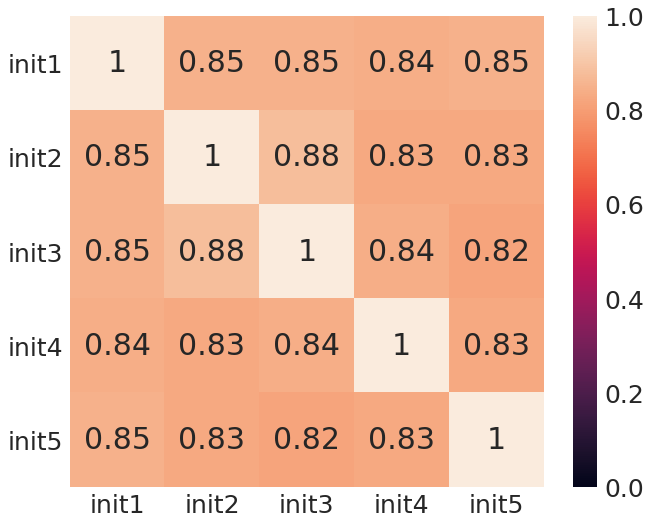

In [71]:
results = np.load('Results/NSynth/init-init-arch.npz')
ckatrain = results['arr_0']

ticklabels = ['init1', 'init2', 'init3', 'init4', 'init5']
plt.figure(figsize = (10,8))
sns.heatmap(np.round(ckatrain[:,:,0], 2), vmin=0, vmax=1, xticklabels = ticklabels,
                yticklabels = ticklabels, annot=True)
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/init-init-arch-Regular.png')
pass

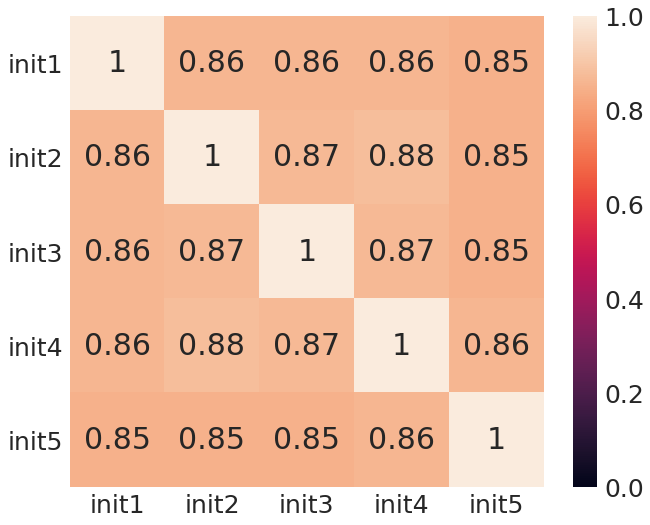

In [72]:
ticklabels = ['init1', 'init2', 'init3', 'init4', 'init5']
plt.figure(figsize = (10,8))
sns.heatmap(np.round(ckatrain[:,:,1], 2), vmin=0, vmax=1, xticklabels = ticklabels,
                yticklabels = ticklabels, annot=True)
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/init-init-arch-Deformable.png')
pass

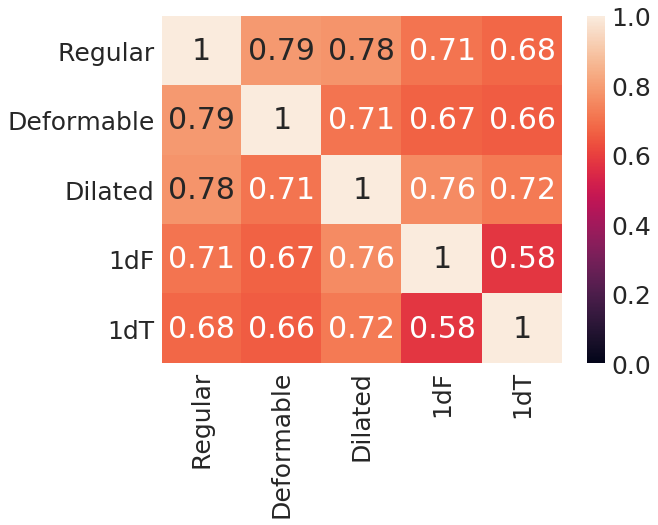

In [73]:
results = np.load('Results/NSynth/arch-arch-init.npz')
ckatrain = results['arr_0']

ticklabels = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']
plt.figure(figsize = (10,8))
sns.heatmap(np.round(np.mean(ckatrain, axis = 2), 2),  vmin = 0, vmax = 1,
            xticklabels = ticklabels,
                yticklabels = ticklabels, annot=True)
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/arch-arch-avg.png')
pass

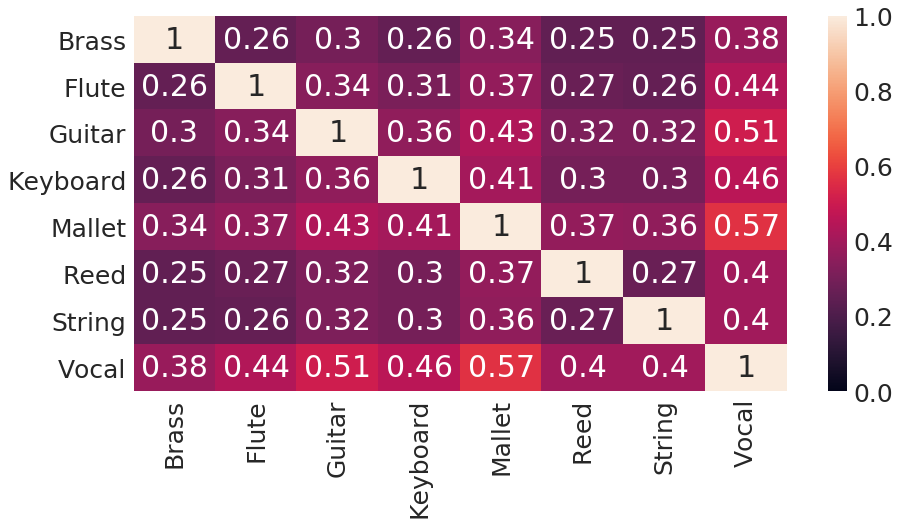

In [76]:
results = np.load('Results/NSynth/class-class-init-Regular.npz')
ckatrain = results['arr_0']

ticklabels = ['Brass', 'Flute', 'Guitar', 'Keyboard', 'Mallet', 'Reed', 'String', 'Vocal']
plt.figure(figsize = (14,8))
sns.heatmap(np.round(np.mean(ckatrain, axis = 2), 2),  vmin=0, vmax=1, xticklabels = ticklabels,
                yticklabels = ticklabels, annot=True)
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/class-class-avg.png')
pass

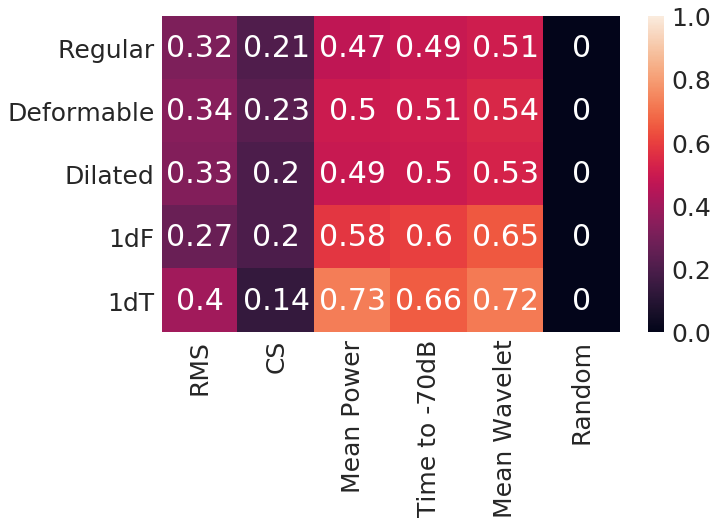

In [77]:
results = np.load('Results/NSynth/arch-spec-init.npz')
ckatrain = results['arr_0']

yticklabels = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']
xticklabels = ['RMS', 'CS', 'Mean Power', 'Time to -70dB', 'Mean Wavelet', 'Random']
plt.figure(figsize = (11,8))
sns.heatmap(np.round(np.mean(ckatrain, axis = 2), 2),  vmin = 0, vmax = 1, annot=True,
           xticklabels = xticklabels, yticklabels = yticklabels)
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/arch-spec-avg.png')
pass

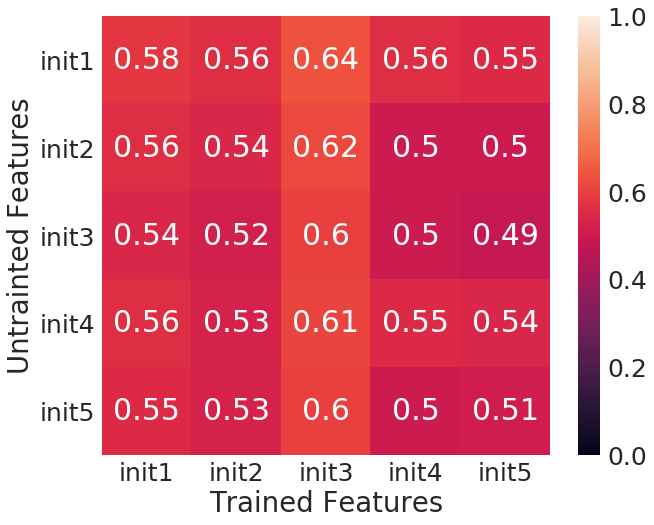

In [16]:
results = np.load('Results/NSynth/Untrained_init-init-arch.npz')
ckatrain = results['arr_0']

ticklabels = ['init1', 'init2', 'init3', 'init4', 'init5']
plt.figure(figsize = (10,8))
sns.heatmap(np.round(ckatrain[:,:,0], 2), vmin=0, vmax=1, xticklabels = ticklabels,
                yticklabels = ticklabels, annot=True)
plt.xlabel('Trained Features')
plt.ylabel('Untrainted Features')
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/Untrained_init-init-arch-Regular.png')
pass

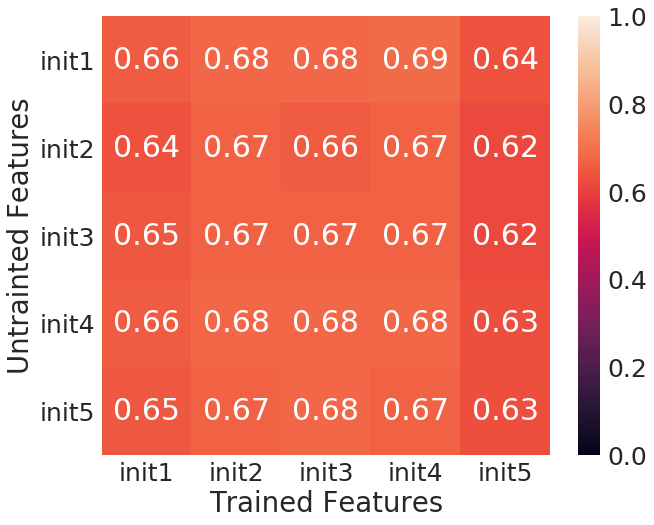

In [17]:
ticklabels = ['init1', 'init2', 'init3', 'init4', 'init5']
plt.figure(figsize = (10,8))
sns.heatmap(np.round(ckatrain[:,:,1], 2), vmin=0, vmax=1, xticklabels = ticklabels,
                yticklabels = ticklabels, annot=True)
plt.xlabel('Trained Features')
plt.ylabel('Untrainted Features')
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/Untrained_init-init-arch-Deformable.png')
pass

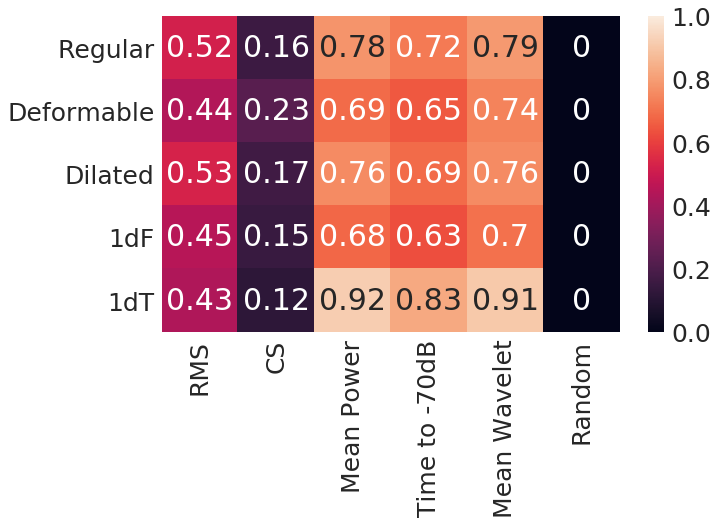

In [80]:
results = np.load('Results/NSynth/Untrained_arch-spec-init.npz')
ckatrain = results['arr_0']

yticklabels = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']
xticklabels = ['RMS', 'CS', 'Mean Power', 'Time to -70dB', 'Mean Wavelet', 'Random']
plt.figure(figsize = (11,8))
sns.heatmap(np.round(np.mean(ckatrain, axis = 2), 2),  vmin = 0, vmax = 1, annot=True,
           xticklabels = xticklabels, yticklabels = yticklabels)
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/Untrained_arch-spec-avg.png')
pass

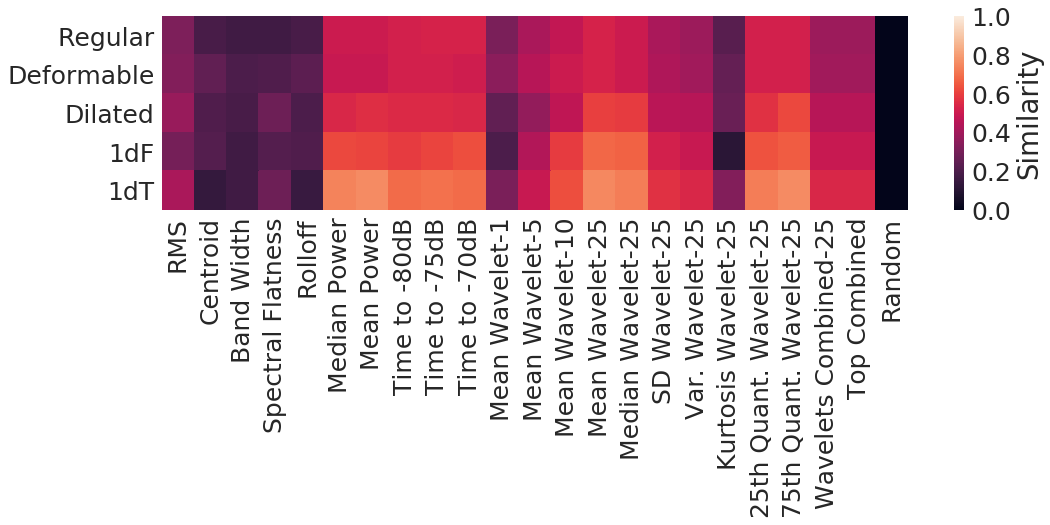

In [22]:
ckatrain = np.load('Results/NSynth/arch-spec-init-all.npy')

yticklabels = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']
xticklabels = ['RMS', 'Centroid', 'Band Width', 'Spectral Flatness', 'Rolloff', 
               'Median Power', 'Mean Power', 'Time to -80dB', 'Time to -75dB',  
               'Time to -70dB', 'Mean Wavelet-1', 'Mean Wavelet-5', 'Mean Wavelet-10',
               'Mean Wavelet-25', 'Median Wavelet-25', 'SD Wavelet-25', 'Var. Wavelet-25',  
               'Kurtosis Wavelet-25','25th Quant. Wavelet-25', '75th Quant. Wavelet-25',
               'Wavelets Combined-25', 'Top Combined', 'Random']
plt.figure(figsize = (16,8))
sns.heatmap(np.round(ckatrain[:,:,0], 2),  vmin = 0, vmax = 1, 
           xticklabels = xticklabels, yticklabels = yticklabels,
           cbar_kws={'label': 'Similarity'})
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/arch-spec-avg-all.png')
pass

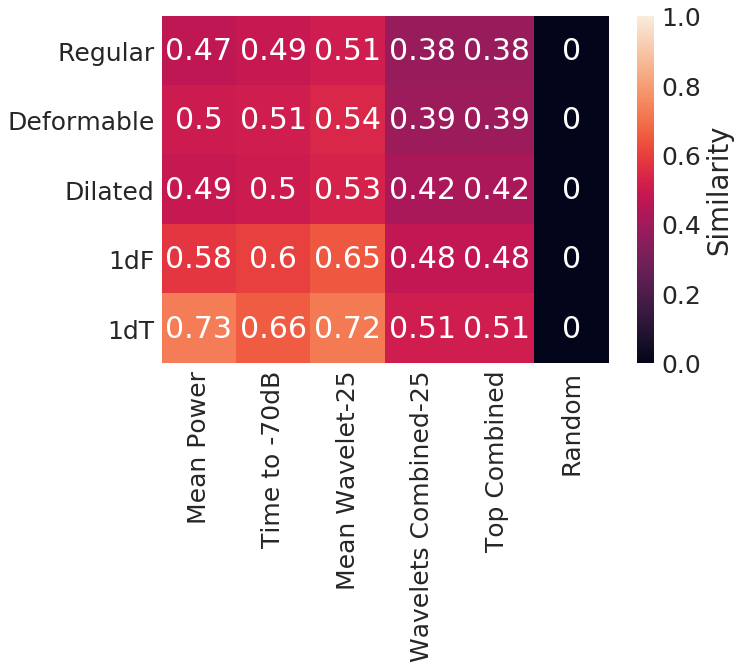

In [23]:
ckatrain = np.load('Results/NSynth/arch-spec-init-all-top5.npy')
xticklabels = ['Mean Power', 'Time to -70dB', 
               'Mean Wavelet-25', 
               'Wavelets Combined-25', 'Top Combined', 'Random']
plt.figure(figsize = (11,10))
sns.heatmap(np.round(np.mean(ckatrain, axis = 2), 2),  
            vmin = 0, vmax = 1, annot = True,
           xticklabels = xticklabels, yticklabels = yticklabels,
           cbar_kws={'label': 'Similarity'})
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/arch-spec-avg-top5.png')
pass

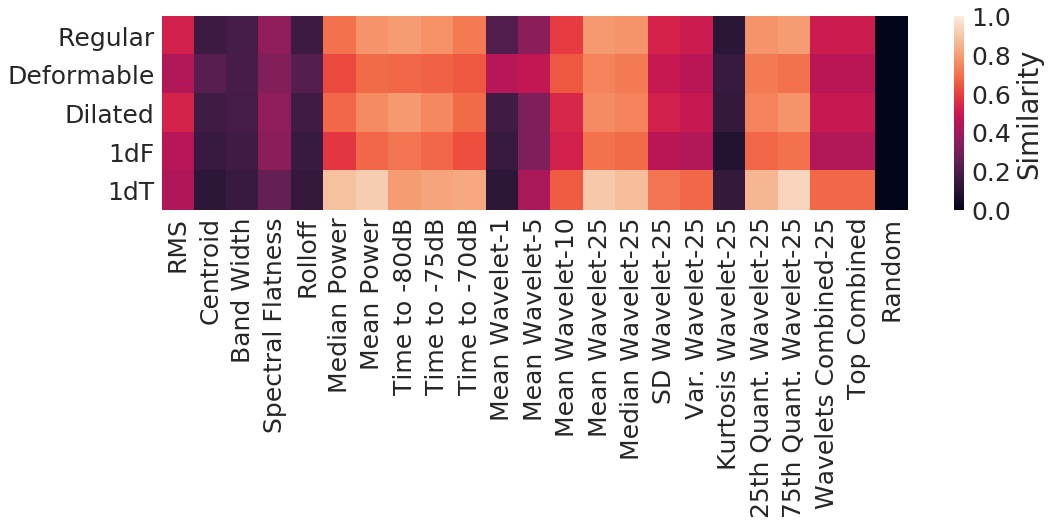

In [15]:
ckatrain = np.load('Results/NSynth/Untrained_arch-spec-init-all.npy')

yticklabels = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']
xticklabels = ['RMS', 'Centroid', 'Band Width', 'Spectral Flatness', 'Rolloff', 
               'Median Power', 'Mean Power', 'Time to -80dB', 'Time to -75dB',  
               'Time to -70dB', 'Mean Wavelet-1', 'Mean Wavelet-5', 'Mean Wavelet-10',
               'Mean Wavelet-25', 'Median Wavelet-25', 'SD Wavelet-25', 'Var. Wavelet-25',  
               'Kurtosis Wavelet-25','25th Quant. Wavelet-25', '75th Quant. Wavelet-25',
               'Wavelets Combined-25', 'Top Combined', 'Random']
plt.figure(figsize = (16,8))
sns.heatmap(np.round(ckatrain[:,:,0], 2),  vmin = 0, vmax = 1, 
           xticklabels = xticklabels, yticklabels = yticklabels,
           cbar_kws={'label': 'Similarity'})
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/Untrained_arch-spec-init-all.png')
pass

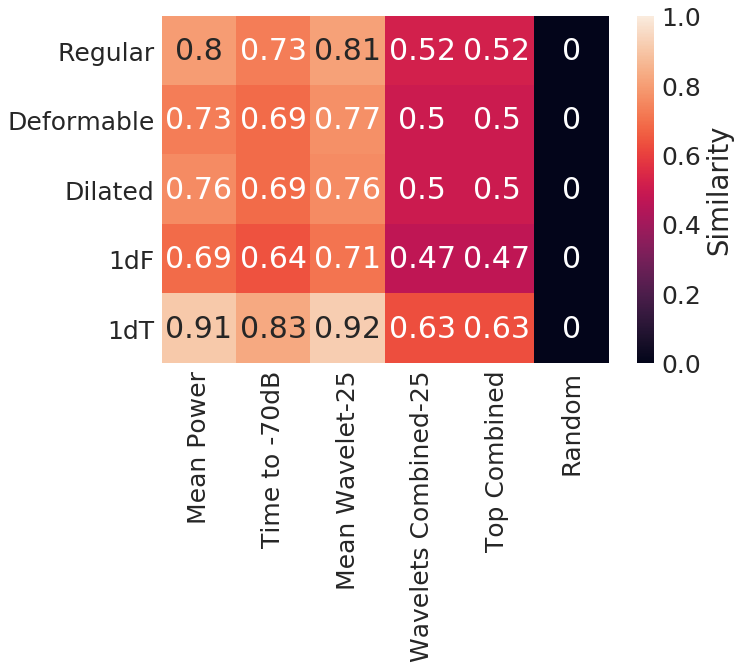

In [16]:
ckatrain = np.load('Results/NSynth/Untrained_arch-spec-init-all-top5.npy')
xticklabels = ['Mean Power', 'Time to -70dB', 
               'Mean Wavelet-25', 
               'Wavelets Combined-25', 'Top Combined', 'Random']
plt.figure(figsize = (11,10))
sns.heatmap(np.round(np.mean(ckatrain, axis = 2), 2),  
            vmin = 0, vmax = 1, annot = True,
           xticklabels = xticklabels, yticklabels = yticklabels,
           cbar_kws={'label': 'Similarity'})
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/Untrained_arch-spec-init-all-top5.png')
pass

## Additional Similarities

In [9]:
# def linear_regression(X, Y):
#     ## Convert to tensor
#     X = torch.from_numpy(X).float()
#     Y = torch.from_numpy(Y).float()
#     ## beta = (X^TX)^{-1}X^TY
#     beta = torch.inverse(X.T@X)@X.T@Y
#     beta_norm = torch.norm(beta, p = 'fro')
#     d1 = torch.norm(X, p = 'fro')
#     sim = 1 - (beta_norm/d1)*(beta_norm/d1)
#     sim = sim.numpy()
#     return(sim)

In [10]:
def CCA_and_linear_regression(X, Y):
    ## Convert to tensor
    X = torch.from_numpy(X).float()
    Y = torch.from_numpy(Y).float()
    ## QR decomp
    QX, _ = torch.qr(X)
    QY, _ = torch.qr(Y)
    
    num = torch.norm(QY.T@QX, p = 'fro')
    sim = (num/X.shape[1])*num
    sim_CCA = sim.numpy()
    ## Linear regression
    num =  torch.norm(QY.T@X, p = 'fro')
    d1 = torch.norm(X, p = 'fro')
    sim = (num/d1)*(num/d1)
    sim_LR = sim.numpy()
    return(sim_CCA, sim_LR)

## Arch vs. spec features vs init

In [11]:

wavecombine = np.hstack([train_wavemed, train_wavesd, train_wavevar,
                           train_wavekurt, train_waveq25, train_waveq75])
top5combine = np.hstack([train_meanp, train_tp70, train_wave25, wavecombine])


spec_features = [train_meanp, train_tp70, train_wave25, 
                 wavecombine, top5combine, train_random]
lrtrain = np.zeros((5, len(spec_features), 5))
ccatrain = np.zeros((5, len(spec_features), 5))
arch_list = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']

In [12]:
for k in range(5): ## inits
    for i in range(len(arch_list)):
        ## i - architecture
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[i]+'-'+str(k)+'-train.npz')
        l3_train = feat['arr_0']
        feat = np.load('../../Deep-Features/NSynth/'+arch_list[i]+'-'+str(k)+'-test.npz')
        l3_test = feat['arr_0']
        ## Flatten and scale
        ## Data loader
        l3_train = l3_train.reshape(-1, l3_train.shape[1]*l3_train.shape[2]*l3_train.shape[3])
        l3_test = l3_test.reshape(-1, l3_test.shape[1]*l3_test.shape[2]*l3_test.shape[3])
        scaler = preprocessing.StandardScaler(with_std=False).fit(l3_train)
        X_train = scaler.transform(l3_train)
        X_test = scaler.transform(l3_test)
        for j in range(len(spec_features)):
            ## j - hand-crafted feature
            sim_CCA, sim_LR = CCA_and_linear_regression(X_train, spec_features[j])
            lrtrain[i,j,k] = sim_LR
            ccatrain[i,j,k] = sim_CCA
            print(i, j, k)

0 0 0
0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
1 0 0
1 1 0
1 2 0
1 3 0
1 4 0
1 5 0
2 0 0
2 1 0
2 2 0
2 3 0
2 4 0
2 5 0
3 0 0
3 1 0
3 2 0
3 3 0
3 4 0
3 5 0
4 0 0
4 1 0
4 2 0
4 3 0
4 4 0
4 5 0
0 0 1
0 1 1
0 2 1
0 3 1
0 4 1
0 5 1
1 0 1
1 1 1
1 2 1
1 3 1
1 4 1
1 5 1
2 0 1
2 1 1
2 2 1
2 3 1
2 4 1
2 5 1
3 0 1
3 1 1
3 2 1
3 3 1
3 4 1
3 5 1
4 0 1
4 1 1
4 2 1
4 3 1
4 4 1
4 5 1
0 0 2
0 1 2
0 2 2
0 3 2
0 4 2
0 5 2
1 0 2
1 1 2
1 2 2
1 3 2
1 4 2
1 5 2
2 0 2
2 1 2
2 2 2
2 3 2
2 4 2
2 5 2
3 0 2
3 1 2
3 2 2
3 3 2
3 4 2
3 5 2
4 0 2
4 1 2
4 2 2
4 3 2
4 4 2
4 5 2
0 0 3
0 1 3
0 2 3
0 3 3
0 4 3
0 5 3
1 0 3
1 1 3
1 2 3
1 3 3
1 4 3
1 5 3
2 0 3
2 1 3
2 2 3
2 3 3
2 4 3
2 5 3
3 0 3
3 1 3
3 2 3
3 3 3
3 4 3
3 5 3
4 0 3
4 1 3
4 2 3
4 3 3
4 4 3
4 5 3
0 0 4
0 1 4
0 2 4
0 3 4
0 4 4
0 5 4
1 0 4
1 1 4
1 2 4
1 3 4
1 4 4
1 5 4
2 0 4
2 1 4
2 2 4
2 3 4
2 4 4
2 5 4
3 0 4
3 1 4
3 2 4
3 3 4
3 4 4
3 5 4
4 0 4
4 1 4
4 2 4
4 3 4
4 4 4
4 5 4


In [13]:
np.savez('Results/NSynth/arch-spec-init-top5-additional', lrtrain, ccatrain)

## layer vs spec vs init

In [14]:
lrtrain = np.zeros((5, len(spec_features), 5))
ccatrain = np.zeros((5, len(spec_features), 5))
arch = 'Regular'
for k in range(5): ## inits
    print(k)
    feat = np.load('../../Deep-Features/NSynth-IF/'+arch+'-'+str(k)+'-train.npz')
    l1 = feat['arr_0']
    pool1 = feat['arr_1']
    l2 = feat['arr_2']
    pool2 = feat['arr_3']
    l3 = feat['arr_4']
    
    ## Flatten and scale
    l1 = l1.reshape(-1, 124*124)
    scaler = preprocessing.StandardScaler(with_std=False).fit(l1)
    l1 = scaler.transform(l1)
    pool1 = pool1.reshape(-1, 62*62)
    scaler = preprocessing.StandardScaler(with_std=False).fit(pool1)
    pool1 = scaler.transform(pool1)
    l2 = l2.reshape(-1, l2.shape[1]*l2.shape[2]*l2.shape[3])
    scaler = preprocessing.StandardScaler(with_std=False).fit(l2)
    l2 = scaler.transform(l2)
    pool2 = pool2.reshape(-1, pool2.shape[1]*pool2.shape[2]*pool2.shape[3])
    scaler = preprocessing.StandardScaler(with_std=False).fit(pool2)
    pool2 = scaler.transform(pool2)
    l3 = l3.reshape(-1, l3.shape[1]*l3.shape[2]*l3.shape[3])
    scaler = preprocessing.StandardScaler(with_std=False).fit(l3)
    l3 = scaler.transform(l3)
    
    feats = [l1, pool1, l2, pool2, l3]
    for i in range(5):
        for j in range(len(spec_features)):
    
            sim_CCA, sim_LR = CCA_and_linear_regression(feats[i], spec_features[j])
            lrtrain[i,j,k] = sim_LR
            ccatrain[i,j,k] = sim_CCA
            print(i, j, k)

0
0 0 0
0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
1 0 0
1 1 0
1 2 0
1 3 0
1 4 0
1 5 0
2 0 0
2 1 0
2 2 0
2 3 0
2 4 0
2 5 0
3 0 0
3 1 0
3 2 0
3 3 0
3 4 0
3 5 0
4 0 0
4 1 0
4 2 0
4 3 0
4 4 0
4 5 0
1
0 0 1
0 1 1
0 2 1
0 3 1
0 4 1
0 5 1
1 0 1
1 1 1
1 2 1
1 3 1
1 4 1
1 5 1
2 0 1
2 1 1
2 2 1
2 3 1
2 4 1
2 5 1
3 0 1
3 1 1
3 2 1
3 3 1
3 4 1
3 5 1
4 0 1
4 1 1
4 2 1
4 3 1
4 4 1
4 5 1
2
0 0 2
0 1 2
0 2 2
0 3 2
0 4 2
0 5 2
1 0 2
1 1 2
1 2 2
1 3 2
1 4 2
1 5 2
2 0 2
2 1 2
2 2 2
2 3 2
2 4 2
2 5 2
3 0 2
3 1 2
3 2 2
3 3 2
3 4 2
3 5 2
4 0 2
4 1 2
4 2 2
4 3 2
4 4 2
4 5 2
3
0 0 3
0 1 3
0 2 3
0 3 3
0 4 3
0 5 3
1 0 3
1 1 3
1 2 3
1 3 3
1 4 3
1 5 3
2 0 3
2 1 3
2 2 3
2 3 3
2 4 3
2 5 3
3 0 3
3 1 3
3 2 3
3 3 3
3 4 3
3 5 3
4 0 3
4 1 3
4 2 3
4 3 3
4 4 3
4 5 3
4
0 0 4
0 1 4
0 2 4
0 3 4
0 4 4
0 5 4
1 0 4
1 1 4
1 2 4
1 3 4
1 4 4
1 5 4
2 0 4
2 1 4
2 2 4
2 3 4
2 4 4
2 5 4
3 0 4
3 1 4
3 2 4
3 3 4
3 4 4
3 5 4
4 0 4
4 1 4
4 2 4
4 3 4
4 4 4
4 5 4


In [15]:
np.savez('Results/NSynth/layer-spec-init-top5-additional-Regular', 
         lrtrain, ccatrain)


In [16]:
lrtrain = np.zeros((5, len(spec_features), 5))
ccatrain = np.zeros((5, len(spec_features), 5))
arch = 'Deformable'
for k in range(5): ## inits
    print(k)
    feat = np.load('../../Deep-Features/NSynth-IF/'+arch+'-'+str(k)+'-train.npz')
    l1 = feat['arr_0']
    pool1 = feat['arr_1']
    l2 = feat['arr_2']
    pool2 = feat['arr_3']
    l3 = feat['arr_4']
    
    ## Flatten and scale
    l1 = l1.reshape(-1, 124*124)
    scaler = preprocessing.StandardScaler(with_std=False).fit(l1)
    l1 = scaler.transform(l1)
    pool1 = pool1.reshape(-1, 62*62)
    scaler = preprocessing.StandardScaler(with_std=False).fit(pool1)
    pool1 = scaler.transform(pool1)
    l2 = l2.reshape(-1, l2.shape[1]*l2.shape[2]*l2.shape[3])
    scaler = preprocessing.StandardScaler(with_std=False).fit(l2)
    l2 = scaler.transform(l2)
    pool2 = pool2.reshape(-1, pool2.shape[1]*pool2.shape[2]*pool2.shape[3])
    scaler = preprocessing.StandardScaler(with_std=False).fit(pool2)
    pool2 = scaler.transform(pool2)
    l3 = l3.reshape(-1, l3.shape[1]*l3.shape[2]*l3.shape[3])
    scaler = preprocessing.StandardScaler(with_std=False).fit(l3)
    l3 = scaler.transform(l3)
    
    feats = [l1, pool1, l2, pool2, l3]
    for i in range(5):
        for j in range(len(spec_features)):
    
            sim_CCA, sim_LR = CCA_and_linear_regression(feats[i], spec_features[j])
            lrtrain[i,j,k] = sim_LR
            ccatrain[i,j,k] = sim_CCA
            print(i, j, k)

0
0 0 0
0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
1 0 0
1 1 0
1 2 0
1 3 0
1 4 0
1 5 0
2 0 0
2 1 0
2 2 0
2 3 0
2 4 0
2 5 0
3 0 0
3 1 0
3 2 0
3 3 0
3 4 0
3 5 0
4 0 0
4 1 0
4 2 0
4 3 0
4 4 0
4 5 0
1
0 0 1
0 1 1
0 2 1
0 3 1
0 4 1
0 5 1
1 0 1
1 1 1
1 2 1
1 3 1
1 4 1
1 5 1
2 0 1
2 1 1
2 2 1
2 3 1
2 4 1
2 5 1
3 0 1
3 1 1
3 2 1
3 3 1
3 4 1
3 5 1
4 0 1
4 1 1
4 2 1
4 3 1
4 4 1
4 5 1
2
0 0 2
0 1 2
0 2 2
0 3 2
0 4 2
0 5 2
1 0 2
1 1 2
1 2 2
1 3 2
1 4 2
1 5 2
2 0 2
2 1 2
2 2 2
2 3 2
2 4 2
2 5 2
3 0 2
3 1 2
3 2 2
3 3 2
3 4 2
3 5 2
4 0 2
4 1 2
4 2 2
4 3 2
4 4 2
4 5 2
3
0 0 3
0 1 3
0 2 3
0 3 3
0 4 3
0 5 3
1 0 3
1 1 3
1 2 3
1 3 3
1 4 3
1 5 3
2 0 3
2 1 3
2 2 3
2 3 3
2 4 3
2 5 3
3 0 3
3 1 3
3 2 3
3 3 3
3 4 3
3 5 3
4 0 3
4 1 3
4 2 3
4 3 3
4 4 3
4 5 3
4
0 0 4
0 1 4
0 2 4
0 3 4
0 4 4
0 5 4
1 0 4
1 1 4
1 2 4
1 3 4
1 4 4
1 5 4
2 0 4
2 1 4
2 2 4
2 3 4
2 4 4
2 5 4
3 0 4
3 1 4
3 2 4
3 3 4
3 4 4
3 5 4
4 0 4
4 1 4
4 2 4
4 3 4
4 4 4
4 5 4


In [17]:
np.savez('Results/NSynth/layer-spec-init-top5-additional-Deformable', 
         lrtrain, ccatrain)


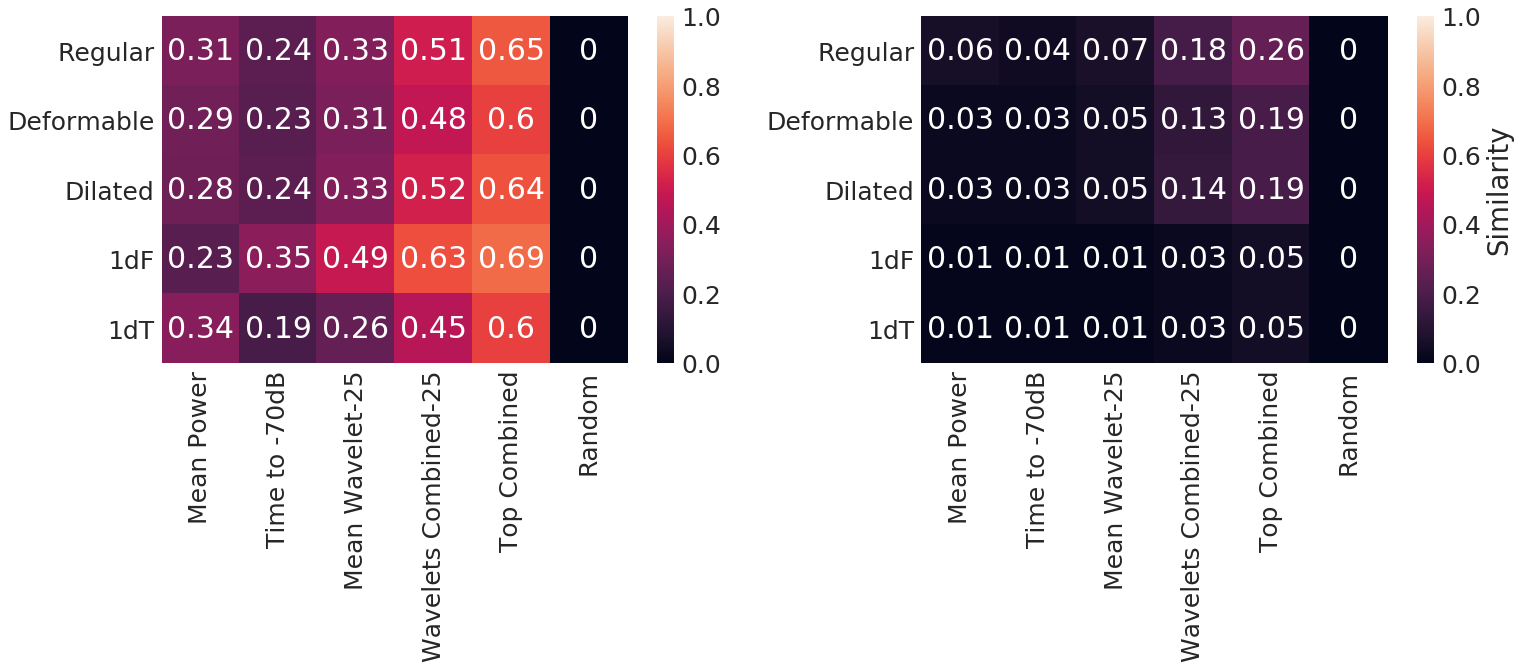

In [19]:
results = np.load('Results/NSynth/arch-spec-init-top5-additional.npz')
lrtrain = results['arr_0']
ccatrain = results['arr_1']
yticklabels = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']
xticklabels = ['Mean Power', 'Time to -70dB', 
               'Mean Wavelet-25', 
               'Wavelets Combined-25', 'Top Combined', 'Random']
plt.figure(figsize = (22,10))
plt.subplot(1, 2, 1)
sns.heatmap(np.round(np.mean(lrtrain, axis = 2), 2),  
            vmin = 0, vmax = 1, annot = True,
           xticklabels = xticklabels, yticklabels = yticklabels)
plt.yticks(rotation=0) 
plt.subplot(1, 2, 2)
sns.heatmap(np.round(np.mean(ccatrain, axis = 2), 2),  
            vmin = 0, vmax = 1, annot = True,
           xticklabels = xticklabels, yticklabels = yticklabels,
           cbar_kws={'label': 'Similarity'})
plt.yticks(rotation=0) 
plt.tight_layout()
# plt.savefig('Results/Orchestral/Untrained_arch-spec-init-all-top5.png')
pass

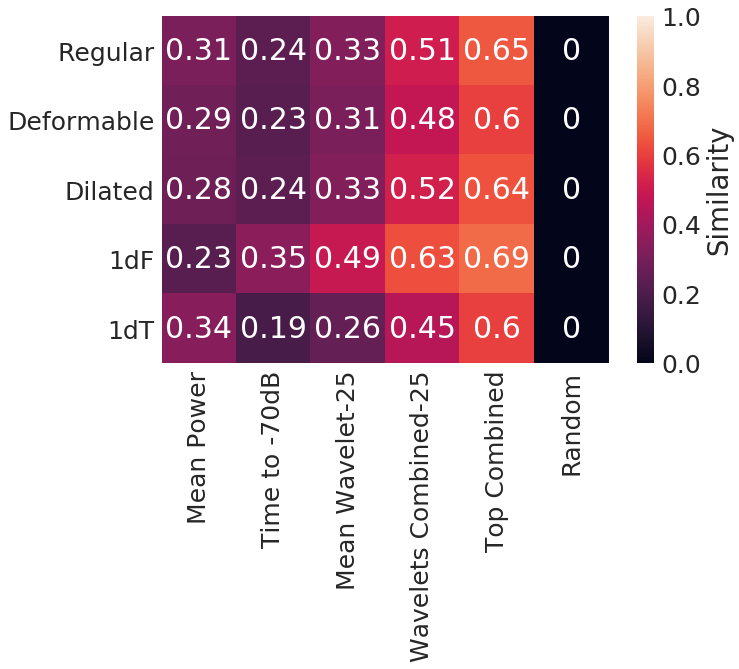

In [20]:
results = np.load('Results/NSynth/arch-spec-init-top5-additional.npz')
lrtrain = results['arr_0']
ccatrain = results['arr_1']
yticklabels = ['Regular', 'Deformable', 'Dilated', '1dF', '1dT']
xticklabels = ['Mean Power', 'Time to -70dB', 
               'Mean Wavelet-25', 
               'Wavelets Combined-25', 'Top Combined', 'Random']
plt.figure(figsize = (11,10))
sns.heatmap(np.round(np.mean(lrtrain, axis = 2), 2),  
            vmin = 0, vmax = 1, annot = True,
           xticklabels = xticklabels, yticklabels = yticklabels,
           cbar_kws={'label': 'Similarity'})
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/arch-spec-init-top5-additional.png')
pass

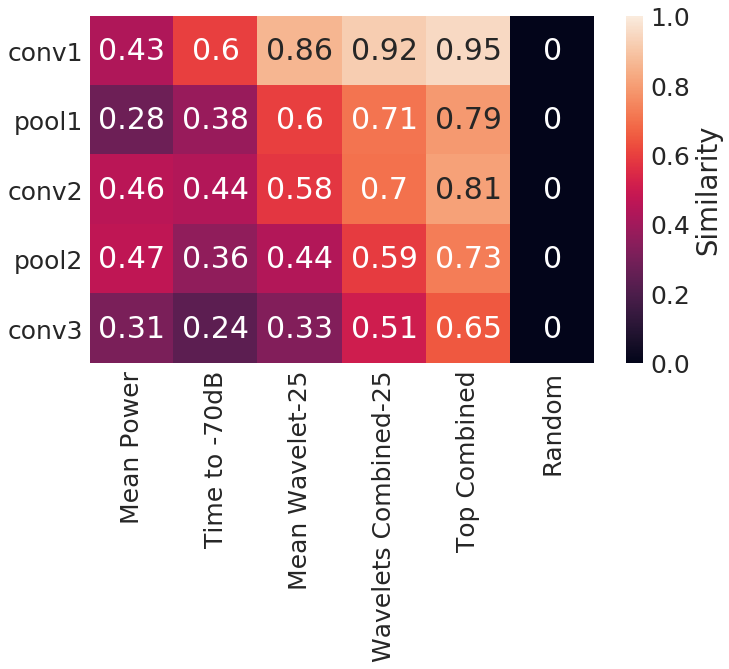

In [21]:
results = np.load('Results/NSynth/layer-spec-init-top5-additional-Regular.npz')
lrtrain = results['arr_0']
ccatrain = results['arr_1']
yticklabels = ['conv1', 'pool1', 'conv2', 'pool2', 'conv3']
xticklabels = ['Mean Power', 'Time to -70dB', 
               'Mean Wavelet-25', 
               'Wavelets Combined-25', 'Top Combined', 'Random']
plt.figure(figsize = (11,10))
sns.heatmap(np.round(np.mean(lrtrain, axis = 2), 2),  
            vmin = 0, vmax = 1, annot = True,
           xticklabels = xticklabels, yticklabels = yticklabels,
           cbar_kws={'label': 'Similarity'})
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/layer-spec-init-top5-additional-Regular.png')
pass

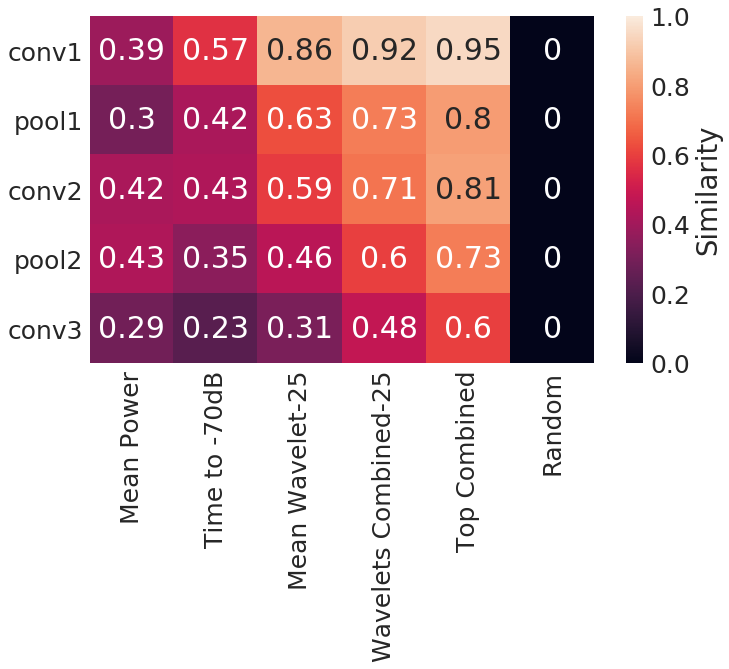

In [22]:
results = np.load('Results/NSynth/layer-spec-init-top5-additional-Deformable.npz')
lrtrain = results['arr_0']
ccatrain = results['arr_1']
yticklabels = ['conv1', 'pool1', 'conv2', 'pool2', 'conv3']
xticklabels = ['Mean Power', 'Time to -70dB', 
               'Mean Wavelet-25', 
               'Wavelets Combined-25', 'Top Combined', 'Random']
plt.figure(figsize = (11,10))
sns.heatmap(np.round(np.mean(lrtrain, axis = 2), 2),  
            vmin = 0, vmax = 1, annot = True,
           xticklabels = xticklabels, yticklabels = yticklabels,
           cbar_kws={'label': 'Similarity'})
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig('Results/NSynth/layer-spec-init-top5-additional-Deformable.png')
pass